In [5]:
import sys
# not best practice, but makes it easier to import from subdirectory
sys.path.insert(0, './lib')

import experiment as exp
import plot
import predict

import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
from hdf5storage import loadmat

import os
import math
import torch
import torchaudio
import pytorch_lightning as pl

import dynamic_strf.modeling as modeling
import dynamic_strf.estimate as estimate
import dynamic_strf.visualize as visualize

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:0')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
e = exp.load('reg_experiment_01', experiment_location='experiments', datadir='Mdata')
e.trials

,null_adjusted_LL,num_filters,num_inh_percent,expt,kernel_widths,kernel_heights,copy_weights,freeze_weights,include_MUs,is_multiexp,batch_size,modelstr,d2xt,name,trial,mean_LLs,l1,center,pos,bcs
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.01,cnim_scaffold0,<experiment.Trial object at 0x7f62a6e007c0>,0.171209,NaN,NaN,NaN,NaN
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold1,<experiment.Trial object at 0x7f628ac53190>,0.202599,0.0001,NaN,NaN,NaN
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold2,<experiment.Trial object at 0x7f628acac400>,0.189786,NaN,0.01,NaN,NaN
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold3,<experiment.Trial object at 0x7f62a7df1580>,0.197507,NaN,NaN,NaN,{'d2xt': 0.001}
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold4,<experiment.Trial object at 0x7f62a7a1a910>,0.148899,NaN,NaN,0.5,NaN


In [17]:
model0 = e.trials_where(name='cnim_scaffold0')[0].model
model1 = e.trials_where(name='cnim_scaffold1')[0].model
model2 = e.trials_where(name='cnim_scaffold2')[0].model
model3 = e.trials_where(name='cnim_scaffold3')[0].model
model4 = e.trials_where(name='cnim_scaffold4')[0].model

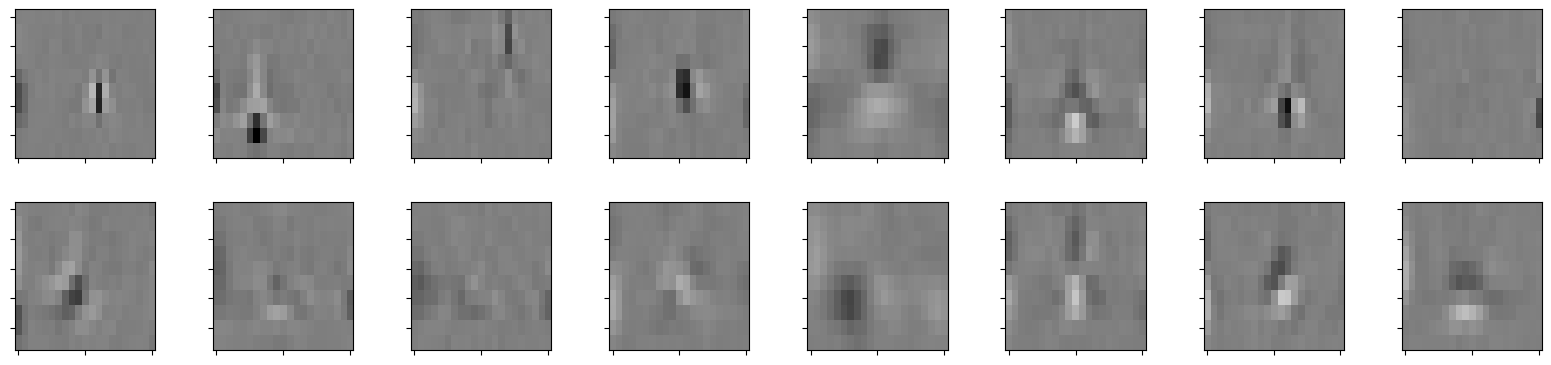

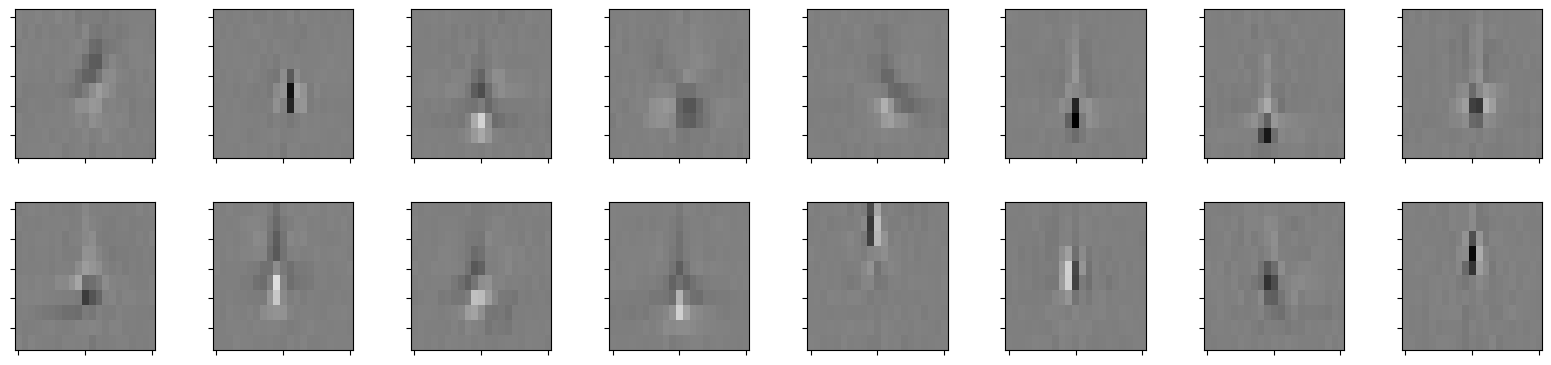

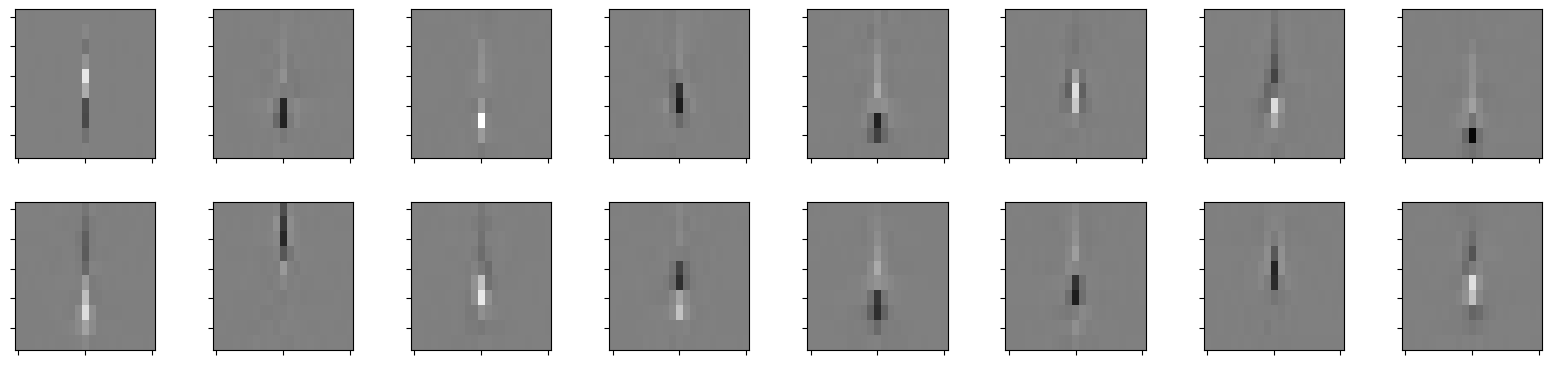

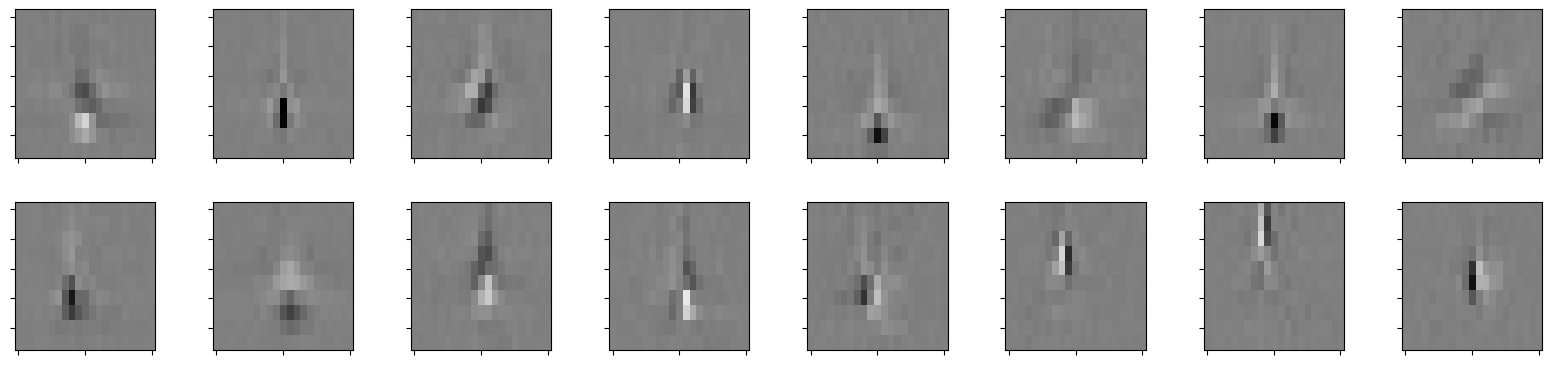

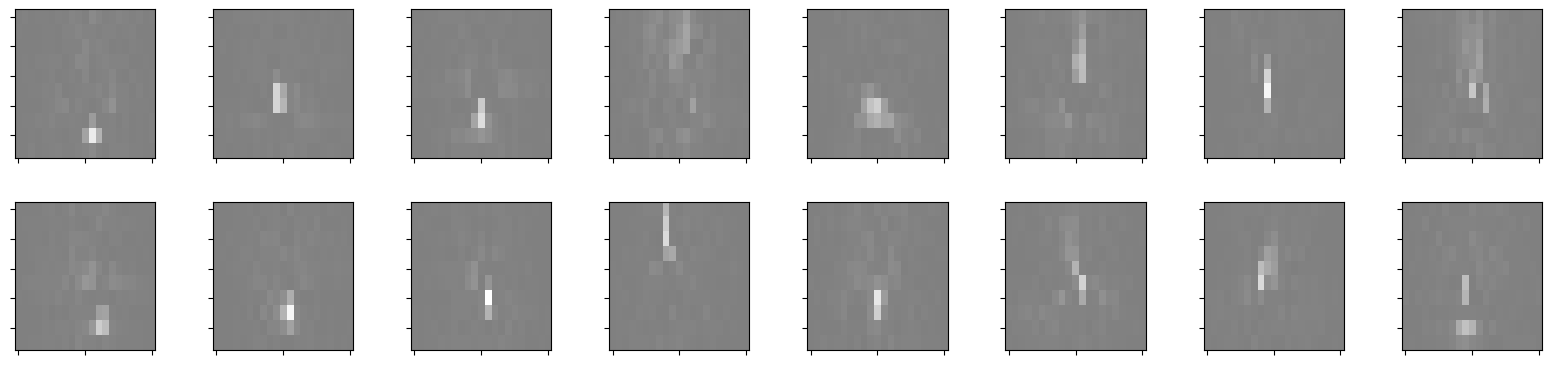

In [18]:
# plot the weights of the models in the different trials
model0.NDN.plot_filters()
model1.NDN.plot_filters()
model2.NDN.plot_filters()
model3.NDN.plot_filters()
model4.NDN.plot_filters()

# trying the new activity regularization

In [41]:
e = exp.load('reg_experiment_02', experiment_location='experiments', datadir='Mdata')
e.trials

,null_adjusted_LL,num_filters,num_inh_percent,expt,kernel_widths,kernel_heights,copy_weights,freeze_weights,include_MUs,is_multiexp,batch_size,modelstr,l1,activity,name,trial,mean_LLs
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.0001,0.0,cnim_scaffold0,<experiment.Trial object at 0x7f626d309730>,0.197844
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.0001,0.1,cnim_scaffold1,<experiment.Trial object at 0x7f626d649b50>,-0.000802
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.0001,0.5,cnim_scaffold2,<experiment.Trial object at 0x7f626d38f340>,-0.000564


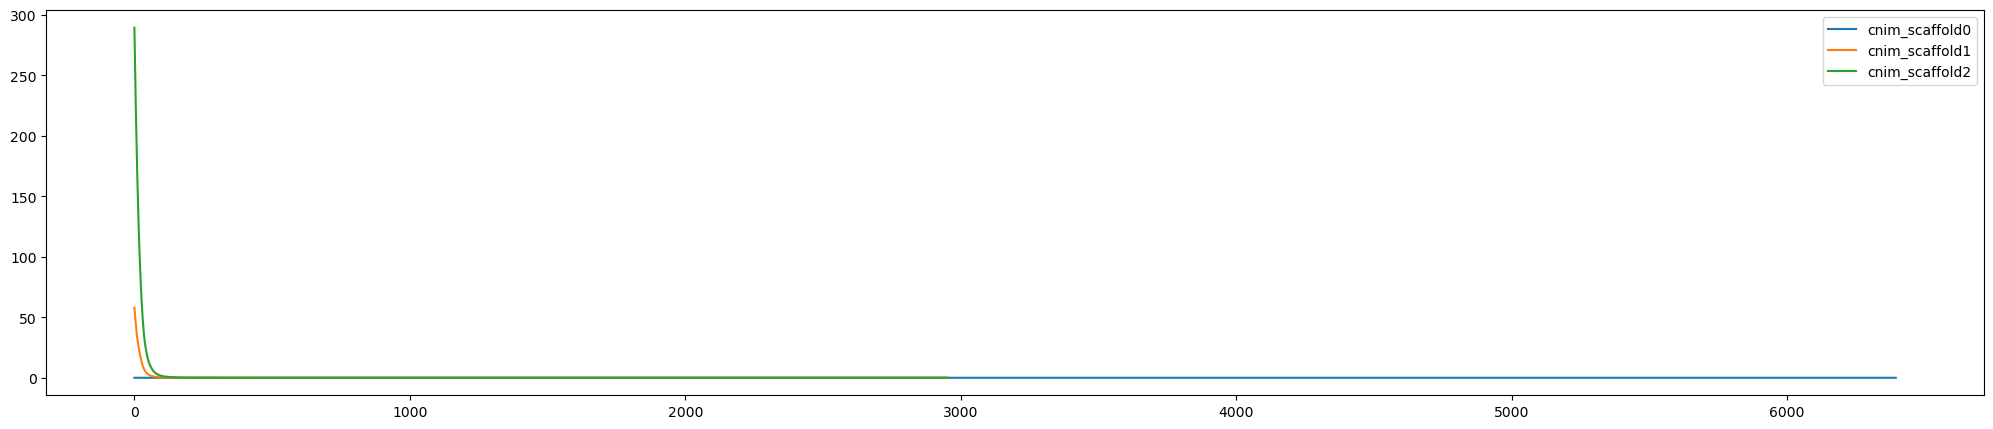

In [44]:
import experiment
e.plot_losses(trials=e.trials_where(null_adjusted_LL=True), loss_type=experiment.Loss.reg, figsize=(25,5))

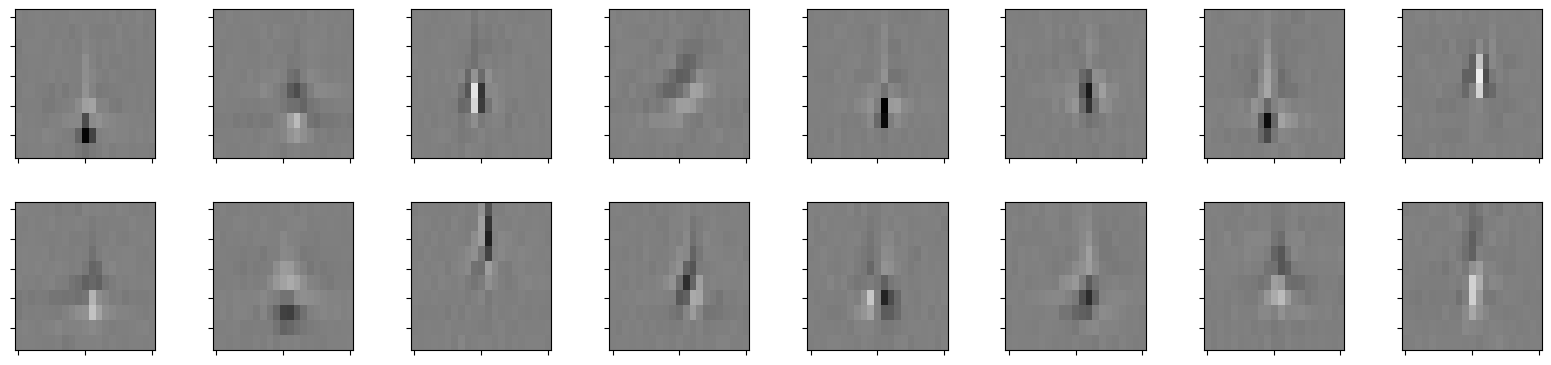

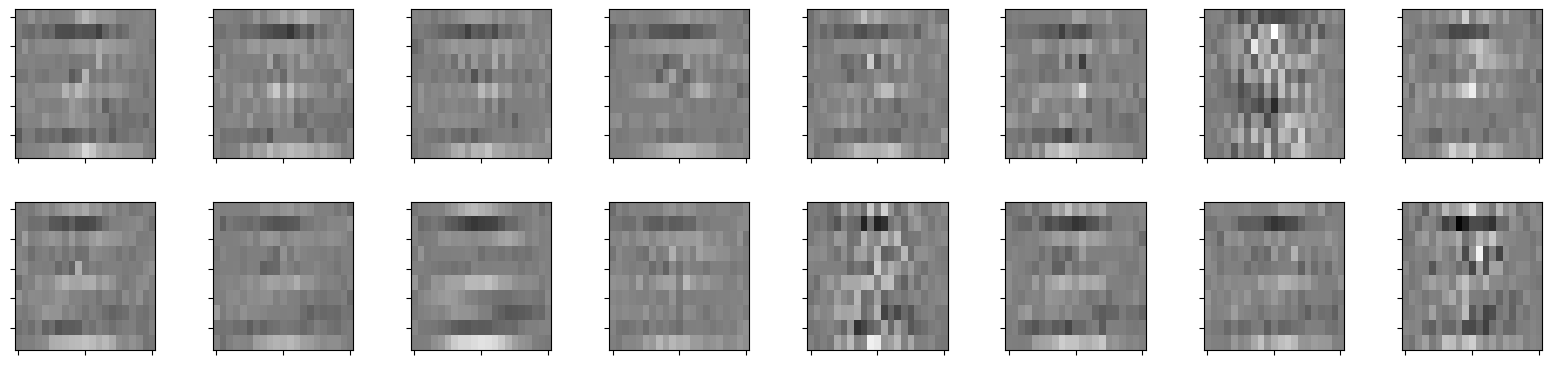

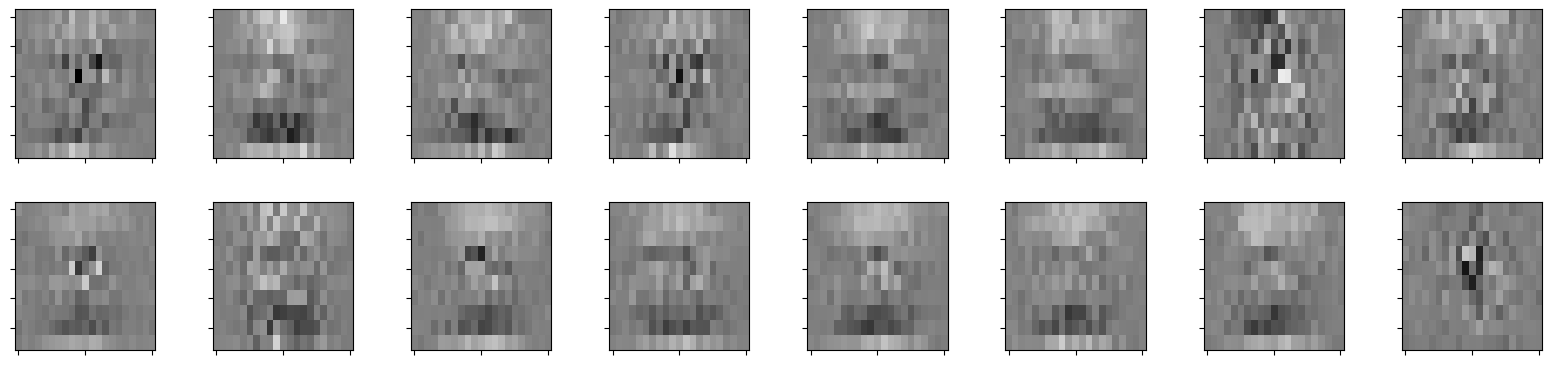

In [47]:
trial0 = e.trials_where(name='cnim_scaffold0')[0]
trial0.model.NDN.plot_filters()
trial1 = e.trials_where(name='cnim_scaffold1')[0]
trial1.model.NDN.plot_filters()
trial2 = e.trials_where(name='cnim_scaffold2')[0]
trial2.model.NDN.plot_filters()

In [49]:
import predict
results0 = predict.predict(trial0.model, dataset=trial0.dataset)
results1 = predict.predict(trial1.model, dataset=trial1.dataset)
results2 = predict.predict(trial2.model, dataset=trial2.dataset)

TypeError: new(): invalid data type 'str'